In this notebook, I define a class for performing an ordinary-least-squares (OLS) linear regression for the sale prices. The OLS fitting will be included as a class method. The original code for the OLS fitting class can be found on David Ziganto's blog *Standard Deviations* here: **https://dziganto.github.io/classes/data%20science/linear%20regression/machine%20learning/object-oriented%20programming/python/Understanding-Object-Oriented-Programming-Through-Machine-Learning/**

In [1]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd

In [26]:
class LinearRegression:
    
    def __init__(self, fit_intercept=True):
        
        self.coeffs_ = None
        self.intercept_ = None
        self.fit_intercept_ = fit_intercept
        
    def fit(self, X, y):
        
        """
        Fit model coefficients. Arguments: X: 1D or 2D numpy array, y: 1D numpy array
        """

        # Check if X is 1D or 2D array: 
        # single variable or multivariate regression
        if len(X.shape) == 1:
            X = X.reshape(-1,1)

        # Add bias if fit_intercept is True
        if self.fit_intercept_:
            X = np.c_[np.ones(X.shape[0]), X] 
            # concatentation function 'c_': 
            # https://numpy.org/doc/stable/reference/generated/numpy.c_.html

        # Closed form solution
        XT_X = np.dot(X.T, X)
        inv_XT_X = np.linalg.inv(XT_X)
        XT_y = np.dot(X.T, y)
        coeffs = [item[0] for item in np.dot(inv_XT_X, XT_y)]

        # Set attributes
        if self.fit_intercept_:
            
            self.intercept_ = coeffs[0]
            self.coeffs_ = coeffs[1:]
            
        else:
            self.intercept_ = 0
            self.coeffs_ = coeffs
            
    def predict(self, X):
        
        """
        Output model prediction. Arguments: X: 1D or 2D numpy array 
        """

        # Check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1) 

        return [item[0] for item in self.intercept_ + np.dot(X, self.coeffs_)]

Load the numerical feature data.

In [2]:
num_df = pd.read_csv('AmesHousing_NumericalFeatures.csv')
num_cols = list(num_df.columns)

In [3]:
num_df

,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,31770,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,...,210,62,0,0,0,0,0,5,2010,215000
1,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,...,140,0,0,0,120,0,0,6,2010,105000
2,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,11160,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,...,0,0,0,0,0,0,0,4,2010,244000
4,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,20000,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,...,474,0,0,0,0,0,0,9,2006,131000
2743,7937,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,...,120,0,0,0,0,0,0,3,2006,142500
2744,8885,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,...,164,0,0,0,0,0,0,6,2006,131000
2745,10010,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,...,240,38,0,0,0,0,0,4,2006,170000


Let's take the data above and perform an OLS linear regression for the sale prices.

In [27]:
lin_reg = LinearRegression()

X = num_df.iloc[:,:-1].values
y = num_df.iloc[:,-1:].values

lin_reg.fit(X, y)

In [28]:
intercept = lin_reg.intercept_
print(np.around(intercept, 4))

-8403729.3887


In [25]:
coeffs = lin_reg.coeffs_
coeffs

[6.45471212192308,
 20412.098288298817,
 -15211.324398477562,
 194.65905388754254,
 347143556650457.4,
 347143556650762.94,
 347143556651196.3,
 -347143556651187.06,
 1793.3546324968338,
 1783.9284021258354,
 1472.7380946874619,
 -1536.029761493206,
 6166.341954821721,
 -3028.584191855043,
 1199.7073514685035,
 -3809.6439438723028,
 -10412.25354700908,
 -44854.45576176047,
 5079.166855843738,
 7129.075220029801,
 -26.210142283991445,
 12180.379870217294,
 24.55806109603145,
 19.279309457845102,
 -11.51471298985416,
 25.0401631247114,
 9.46940489881672,
 64.54767114004107,
 -56.87240703066345,
 -9.75485986680087,
 16.72447345405817,
 -705.396961659193]

We see that naïvely applying the OLS regression directly to the raw numerical data produces coefficients with astronomically large values. Let's investigate the features for which this is occurring.

In [50]:
prob_cols = [num_cols[index] for index, coeff in enumerate(coeffs) if np.abs(coeff) > 1.0e6]
print(prob_cols)

[]


The investigation starts with looking at the distribution of values for each feature.

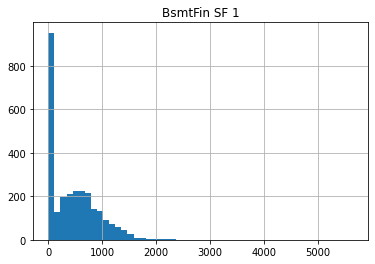

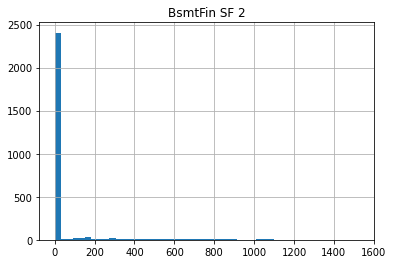

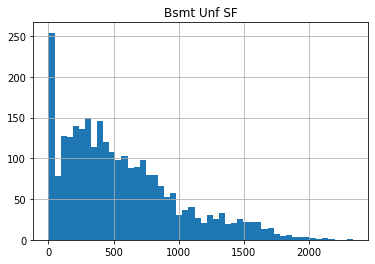

In [40]:
prob_col_vals = list()
for col in prob_cols:
    prob_col_vals.append(list(num_df[col].values))
    num_df[col].hist(bins=50)
    plt.title(col)
    plt.show()

In [46]:
for i in range(len(prob_col_vals)):
    print(prob_cols[i], len([val for val in prob_col_vals[i] if val > 0])/len(prob_col_vals[i]))

BsmtFin SF 1 0.6989443028758646
BsmtFin SF 2 0.12559155442300693
Bsmt Unf SF 0.9213687659264652


We can see that `BsmtFin SF 2` has only 12.5% of its values greater than zero. So, let's see what happens when we remove this feature.

In [47]:
num_df.drop(columns=['BsmtFin SF 2'], inplace=True)

In [49]:
lin_reg = LinearRegression()

X = num_df.iloc[:,:-1].values
y = num_df.iloc[:,-1:].values

lin_reg.fit(X, y)

intercept, coeffs = lin_reg.intercept_, lin_reg.coeffs_
print(intercept)
coeffs

-4286937.745727539


[1.270264157480824,
 3912.6482730512507,
 -884.9556470667012,
 33.37855066060001,
 -0.1772364302414644,
 -19.24474154256086,
 94.19312160799086,
 768.0,
 960.0,
 832.0,
 -960.0,
 6166.341955058277,
 -3028.5841919310624,
 1199.707351475954,
 -3809.6439434438944,
 -10412.253546984866,
 -44854.45575980842,
 5079.16685571149,
 7129.075220033526,
 -26.210142280673608,
 12180.37987048179,
 24.55806109502737,
 19.279309458008356,
 -11.514712989563122,
 25.040163125129766,
 9.469404899398796,
 64.54767114040442,
 -56.87240703054704,
 -9.75485986680178,
 16.72447344660759,
 -705.3969616293907]

I do not understand why the elimination of this single feature fixed the problem of anomalously high coefficient magnitudes for other features ordered near it.

Now we need to address the issue of the significant variability in order of magnitude among the remaining coefficients. My intuition is that it is partly due to the fact that each feature has a different characteristic order of magnitude among its distribution of values. We thus normalize all feature values by their maximum value.

In [52]:
num_cols = list(num_df.columns)

When normalizing the values for each feature, we need to keep track of the maximum values used to normalize for future situation in which we want to convert back to the original values. This is especially critical for the sale prices: we want to be able to convert back to the original number of dollars.

In [54]:
max_vals = list()
max_vals_dict = dict()

for col in num_cols:
    
    max_val = np.max(list(num_df[col].values))
    max_vals.append(max_val)
    num_df[col] = num_df[col].apply(lambda x: x/max_val)
    
max_vals_dict = dict(zip(num_cols, max_vals))

In [55]:
num_df

,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0.147599,0.975124,0.975124,0.07000,0.113218,0.188784,0.176759,0.325025,0.000000,0.0,...,0.147472,0.108772,0.0,0.0,0.000000,0.0,0.000000,0.416667,1.00000,0.284768
1,0.053994,0.975622,0.975622,0.00000,0.082920,0.115582,0.144354,0.175859,0.000000,0.0,...,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.500000,1.00000,0.139073
2,0.066283,0.974129,0.974129,0.06750,0.163536,0.173801,0.217512,0.260844,0.000000,0.0,...,0.275983,0.063158,0.0,0.0,0.000000,0.0,0.735294,0.500000,1.00000,0.227815
3,0.051848,0.979104,0.979104,0.00000,0.188696,0.447346,0.345336,0.414132,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.333333,1.00000,0.323179
4,0.064252,0.993532,0.994030,0.00000,0.140149,0.058647,0.151882,0.182139,0.339467,0.0,...,0.148876,0.059649,0.0,0.0,0.000000,0.0,0.000000,0.250000,1.00000,0.251523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,0.092917,0.975124,0.993035,0.00000,0.216867,0.000000,0.200327,0.240236,0.000000,0.0,...,0.332865,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.750000,0.99801,0.173510
2743,0.036874,0.987065,0.987065,0.00000,0.145110,0.078767,0.164157,0.196860,0.000000,0.0,...,0.084270,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.99801,0.188742
2744,0.041279,0.986567,0.986567,0.00000,0.053331,0.102312,0.141408,0.177036,0.000000,0.0,...,0.115169,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.500000,0.99801,0.173510
2745,0.046505,0.982090,0.982587,0.00000,0.189759,0.083476,0.227332,0.272620,0.000000,0.0,...,0.168539,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.99801,0.225166


In [58]:
lin_reg = LinearRegression()

X = num_df.iloc[:,:-1].values
y = num_df.iloc[:,-1:].values

lin_reg.fit(X, y)

intercept, coeffs = lin_reg.intercept_, lin_reg.coeffs_
print(intercept)
print(coeffs)

1.2778365394915454
[0.6995168024882616, -2.8330590174919053, 3.5434755347996543, 0.08916910101622122, -0.05223483202303214, -0.018349746833749236, 0.6287905202784216, -4.75, -1.5625, -0.96875, 4.5, 0.01633468067377919, -0.008022739582343341, 0.006356065431219804, -0.010091772039217517, -0.08274638580506632, -0.17822962554043542, 0.10091059979083639, 0.03776993494034997, -0.06977799461128598, 0.08066476735615424, 0.04840052305350184, 0.03636256512252167, -0.008693227022590122, 0.033563768322938614, 0.006371467132993303, 0.04924431599654966, -0.060262153133464835, -0.21964585130876912, 0.0002658194518971868, -1.8779442147351801]


To compare apples with apples, we compute the standard deviation of the logarithms of the absolute values of the coefficients before and after normalization.

In [57]:
pre_norm = [1.270264157480824,3912.6482730512507,-884.9556470667012,33.37855066060001,
 -0.1772364302414644,-19.24474154256086,94.19312160799086,768.0,960.0,832.0,-960.0,
 6166.341955058277,-3028.5841919310624,1199.707351475954,-3809.6439434438944,
 -10412.253546984866,-44854.45575980842,5079.16685571149,7129.075220033526,
 -26.210142280673608,12180.37987048179,24.55806109502737,19.279309458008356,
 -11.514712989563122,25.040163125129766,9.469404899398796,64.54767114040442,
 -56.87240703054704,-9.75485986680178,16.72447344660759,-705.3969616293907]

In [59]:
post_norm = [0.6995168024882616, -2.8330590174919053, 3.5434755347996543, 0.08916910101622122,
             -0.05223483202303214, -0.018349746833749236, 0.6287905202784216, -4.75, -1.5625, 
             -0.96875, 4.5, 0.01633468067377919, -0.008022739582343341, 0.006356065431219804, 
             -0.010091772039217517, -0.08274638580506632, -0.17822962554043542, 
             0.10091059979083639, 0.03776993494034997, -0.06977799461128598, 
             0.08066476735615424, 0.04840052305350184, 0.03636256512252167, 
             -0.008693227022590122, 0.033563768322938614, 0.006371467132993303, 
             0.04924431599654966, -0.060262153133464835, -0.21964585130876912, 
             0.0002658194518971868, -1.8779442147351801]

In [61]:
np.std([np.log(np.abs(item)) for item in pre_norm])

2.979775680790979

In [62]:
np.std([np.log(np.abs(item)) for item in post_norm])

2.285201931810642

So, yes: we were able to reduce the variability in the order of magnitude of the coefficients by normalizing the values for each feature by the maximum values.

In [76]:
def sort_dict_by_abs_val(in_dict):
    # Sorts a given dictionary by absolute value of the values.
    return dict(sorted(in_dict.items(), key=lambda item: np.abs(item[1])))

In [70]:
coeffs_names_dict = dict(zip(num_cols, coeffs))
coeffs_names_dict = sort_dict_by_abs_val(coeffs_names_dict)

Now we can make a feature importance plot with this dictionary.

<BarContainer object of 31 artists>

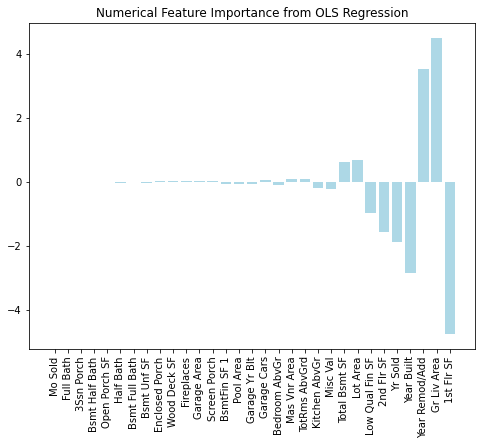

In [81]:
x = coeffs_names_dict.keys()
y = coeffs_names_dict.values()
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
plt.title('Numerical Feature Importance from OLS Regression')
plt.bar(x,y, color='lightblue')

We have implemented an OLS regression using object-orientation, shown how running a preliminary naïve regression fitting provides anomalous feature detection, normalized the numerical values for each feature by their maxima and have removed the anomalous feature to produce a reasonable set of regression coefficients. These reasonable coefficients were then visualized above in a feature importance plot.

Next time, we are going to: (1) introduce a new "metrics" class for evaluating the performance of the regression model and (2) introduce class inheritance so that the regression fitting class can gain access to these metrics.